# Using SBML Control

## Preliminaries

In [1]:
import controlSBML.control_sbml as ctl
import pandas as pd

In [2]:
ctlsb = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000823.2?filename=Varusai2018.xml")

In [3]:
# Print the first few lines of the antimony representation of this model
print(ctlsb.antimony[:380])

// Created by libAntimony v2.12.0
function Constant_flux__irreversible(v)
  v;
end

Constant_flux__irreversible is "Constant flux (irreversible)"

function Henri_Michaelis_Menten__irreversible(substrate, Km, V)
  V*substrate/(Km + substrate);
end

Henri_Michaelis_Menten__irreversible is "Henri-Michaelis-Menten (irreversible)"

function HMM_Mod(V, s, m, Km)
  V*s*m/(Km + s);
end


In [4]:
ctlsb.species_names

['IR',
 'pIR',
 'IRS',
 'pIRS',
 'iIRS',
 'Akt',
 'pAkt',
 'mTORC1',
 'pmTORC1',
 'mTORC2',
 'pmTORC2',
 'imTORC2',
 'mTORC1_DEPTOR',
 'mTORC2_DEPTOR',
 'DEPTOR',
 'pDEPTOR']

In [5]:
ctlsb.jacobian

,IR,pIR,IRS,pIRS,iIRS,Akt,pAkt,mTORC1,pmTORC1,mTORC2,pmTORC2,imTORC2,mTORC1_DEPTOR,mTORC2_DEPTOR,DEPTOR,pDEPTOR
IR,-0.004518,0.028571,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
pIR,0.004518,-0.028571,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
IRS,0.000000,-0.066667,0.0,0.020000,0.02,0.0,0.000000,0.00,-0.066667,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
pIRS,0.000000,0.066667,0.0,-0.020000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
iIRS,0.000000,0.000000,0.0,0.000000,-0.02,0.0,0.000000,0.00,0.066667,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
Akt,0.000000,0.000000,0.0,-0.046729,0.00,0.0,0.058824,0.00,0.000000,0.00,-1.442308,0.0,0.000,0.000,0.00,0.000000
pAkt,0.000000,0.000000,0.0,0.046729,0.00,0.0,-0.058824,0.00,0.000000,0.00,1.442308,0.0,0.000,0.000,0.00,0.000000
mTORC1,0.000000,0.000000,0.0,0.000000,0.00,0.0,-0.099206,-0.35,5.999848,0.00,0.000000,0.0,0.006,0.000,-0.25,0.000000
pmTORC1,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.099206,0.00,-5.999848,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000
mTORC2,0.000000,-0.166667,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,-2.45,0.428571,0.0,0.000,0.006,-1.40,0.000000


In [6]:
# Create a state space representation of the model using the Jacobian at time 1. The A matrix of the sys object is the Jacobian.
ctlsb.setTime(1)
sys = ctlsb.makeStateSpace()
pd.DataFrame(sys.A)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.00454,0.028026,0.000000e+00,0.000000,0.00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000e+00,0.000000
1,0.00454,-0.028026,0.000000e+00,0.000000,0.00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000e+00,0.000000
2,0.00000,-0.066664,-7.541108e-05,0.019991,0.02,0.000000,0.000000,0.000000e+00,-0.066664,0.000000,0.000000,0.0,0.000,0.000,0.000000e+00,0.000000
3,0.00000,0.066664,7.539203e-05,-0.019991,0.00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000e+00,0.000000
4,0.00000,0.000000,1.904712e-08,0.000000,-0.02,0.000000,0.000000,0.000000e+00,0.066664,0.000000,0.000000,0.0,0.000,0.000,0.000000e+00,0.000000
5,0.00000,0.000000,0.000000e+00,-0.046729,0.00,-0.000008,0.058797,0.000000e+00,0.000000,0.000000,-1.442303,0.0,0.000,0.000,0.000000e+00,0.000000
6,0.00000,0.000000,0.000000e+00,0.046729,0.00,0.000008,-0.058797,0.000000e+00,0.000000,0.000000,1.442303,0.0,0.000,0.000,0.000000e+00,0.000000
7,0.00000,0.000000,0.000000e+00,0.000000,0.00,0.000000,-0.099019,-1.467335e-01,5.998972,0.000000,0.000000,0.0,0.006,0.000,-2.018396e-01,0.000000
8,0.00000,0.000000,0.000000e+00,0.000000,0.00,0.000000,0.099019,3.691504e-08,-5.998972,0.000000,0.000000,0.0,0.000,0.000,0.000000e+00,0.000000
9,0.00000,-0.065718,0.000000e+00,0.000000,0.00,0.000000,0.000000,0.000000e+00,0.000000,-1.027522,0.426983,0.0,0.000,0.006,-3.141695e-01,0.000000


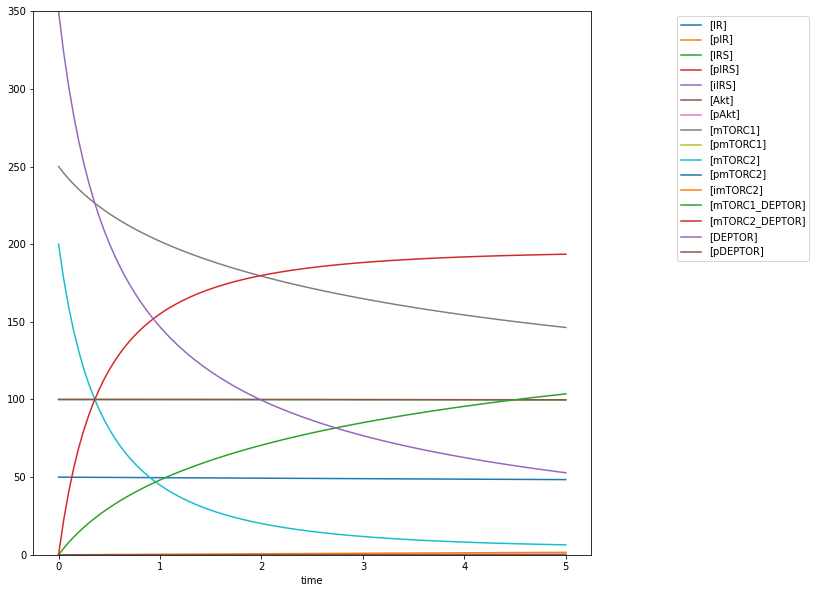

In [7]:
# Plot roadrunner simulation, with better placement of the legend.
ctlsb.plotTrueModel()

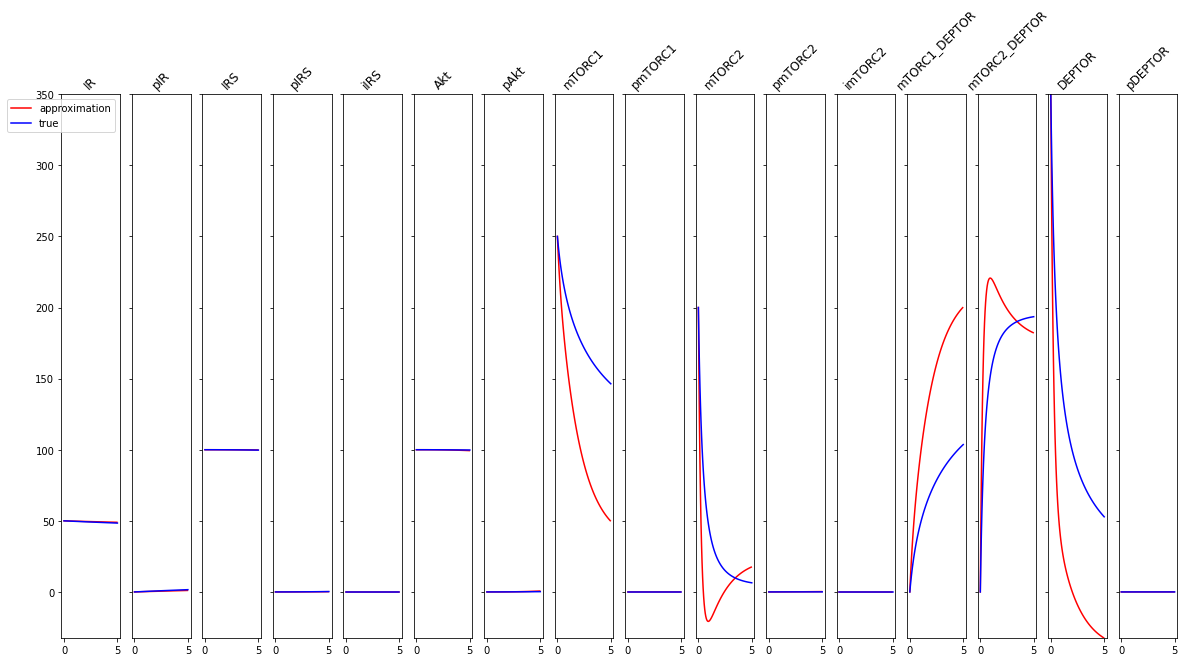

In [9]:
# Compare the linear approximation using the Jacobian at time 0 with the true model
ctlsb.setTime(1)
ctlsb.plotLinearApproximation(figsize=(20, 10))